Use ftdemo as a starting point:

Elapsed time =  0.0  seconds


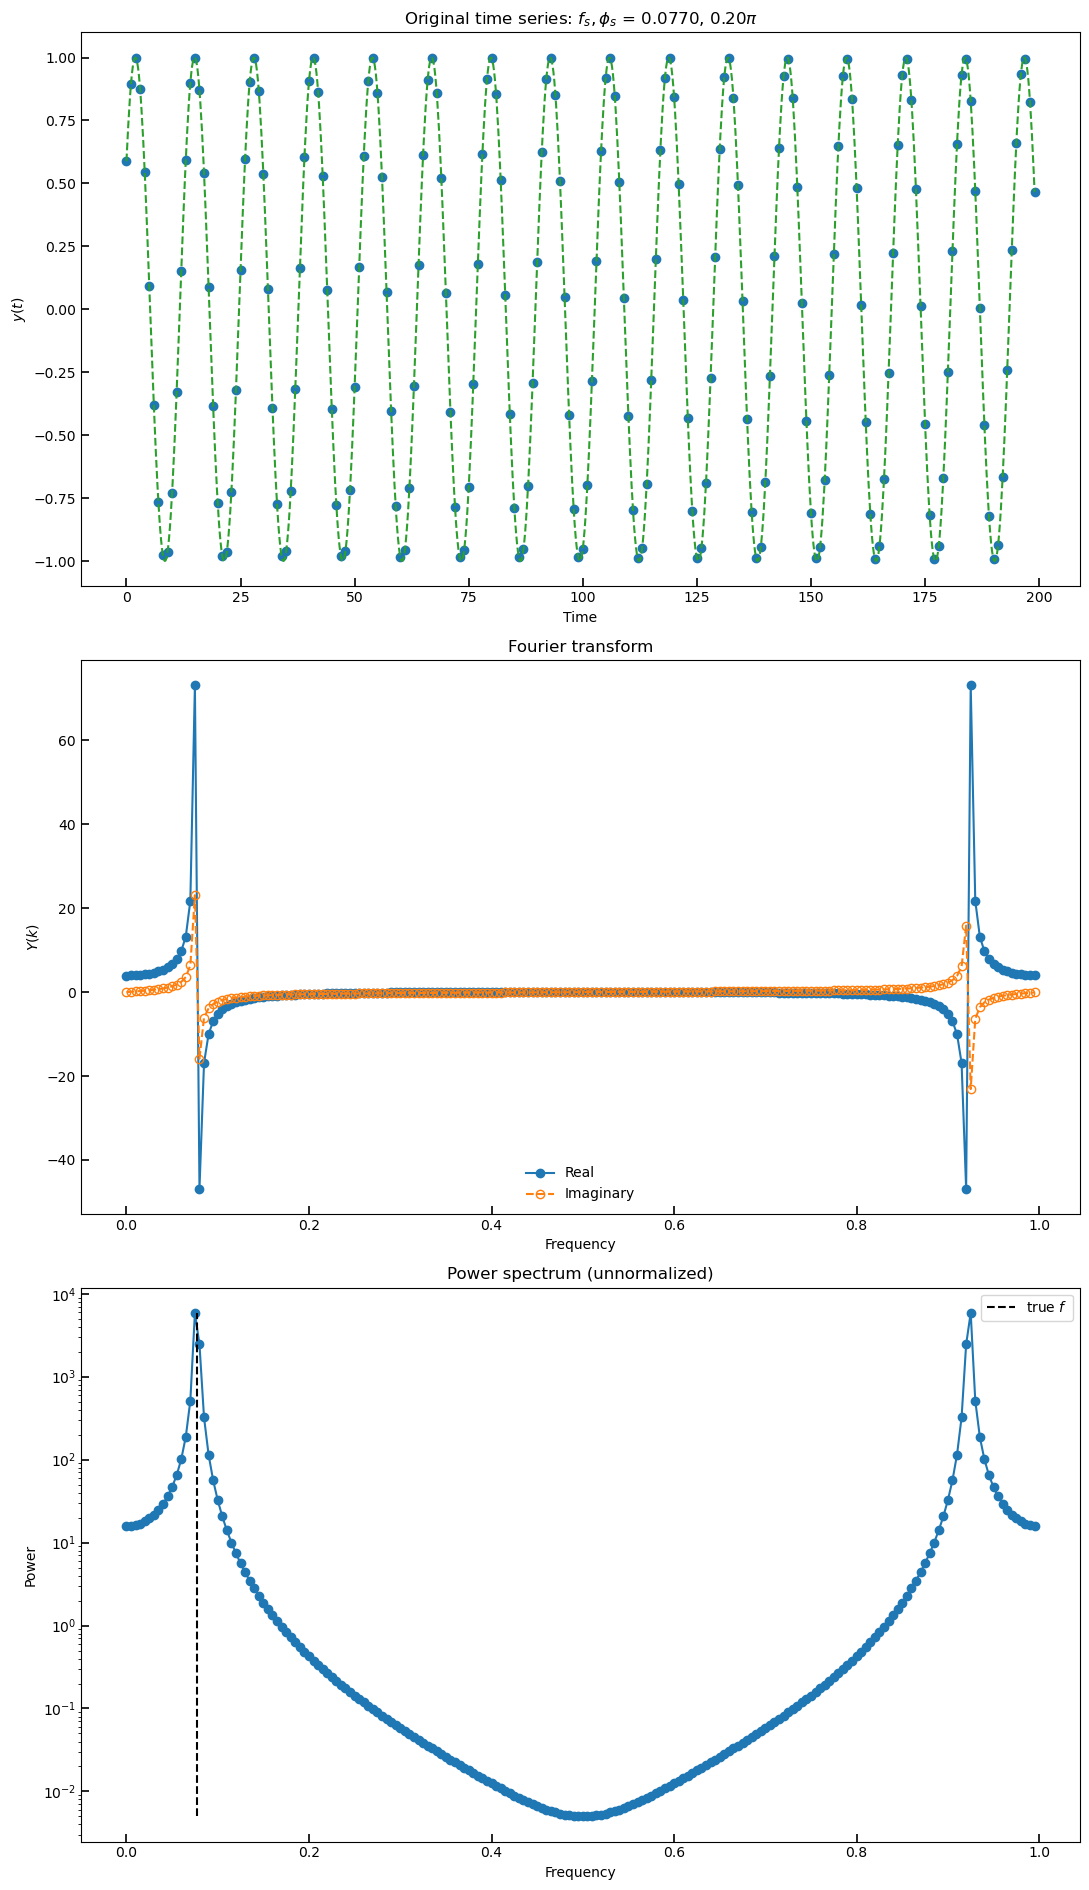

In [110]:
# ftdemo - Discrete Fourier transform demonstration program

# Set up configuration options and special features
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import os


# Define functions to take in integer and float inputs
def dinput(input_text) :
    return int(input(input_text))


def finput(input_text) :
    return float(input(input_text))


def ftdemo(N,freq,phase,dt=1):
    """Plots the time series and FFT of a sine wave with the following parameters
    N - Number of sampling points
    freq - frequency of the signal
    phase - multiplied by pi then taken as phase of signal
    dt - The time step between sample points, defaults to 1

    """
    #* Initialize the sine wave time series to be transformed

    phase = np.pi * phase

    # Generate the data for the time series
    #dt = 1   # Time increment
    t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
    y = np.sin(2*np.pi*t*freq + phase)   # Sine wave time series
    fk = np.arange(N)/(N*dt)           # f = [0, 1/(N*dt), ... ], k index


    # Lets use a finely sampled function to compare to the data, for plotting purposes:
    tmod = np.linspace(0,t[-1],1024)
    ymod = np.sin(2*np.pi*tmod*freq + phase)

    text_vals = r'$f_s, \phi_s$ = {0:.4f}, {1:.2f}$\pi$'.format(freq,phase/np.pi)

    #* Compute the transform using the fast Fourier transform (FFT) algorithm.
    Y = np.zeros(N,dtype=complex)

    startTime = time.time()                     # Fast Fourier transform:
    Y = np.fft.fft(y)               # numpy.fft.fft()

    stopTime = time.time()

    print('Elapsed time = ', stopTime - startTime, ' seconds')

    # power spectrum :
    P = np.abs(Y)**2

    plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

    fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(11, 19))
    #* Graph the time series and its transform
    # Top subplot: time axis
    ax1[0].plot(t,y,'o', label='Input data')
    ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
    ax1[0].set_title('Original time series: ' + text_vals,fontsize=12)
    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('$y(t)$')
    # ax1[0].legend(frameon=True)
    ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Middle subplot: fourier transform
    ax1[1].plot(fk, np.real(Y),'-o', label='Real')
    ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
    ax1[1].legend(frameon=False)
    ax1[1].set_title('Fourier transform',fontsize=12)
    ax1[1].set_xlabel('Frequency')
    ax1[1].set_ylabel('$Y(k)$')
    ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Bottom subplot: Power Spectrum
    ax1[2].semilogy(fk, P,'-o')
    ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
    ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
    ax1[2].set_xlabel('Frequency')
    ax1[2].set_ylabel('Power')
    ax1[2].legend(loc='best')
    ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')
    #savefig('ftdemo_fig2.png')

    plt.tight_layout()

    save = False # Set this flag to true if you want to save the plots.
    if save:
        today = str(datetime.date.today())
        fig_directory = os.path.expanduser('~/figs_out/' + today)
        try:
            os.makedirs(fig_directory)
        except FileExistsError:
            pass

        timeindex = time.strftime("%H%M%S")
        fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

    plt.show()

N = 200
freq = 0.077
phase =  0.2

ftdemo(N,freq,phase)

Modify the sinusoidal input signal (time-series) in ftdemo.py to include two sinusoidal components, where the second one has a much lower frequency than the first. The user should be able to set the phase and frequency of each component separately.

Elapsed time =  0.0  seconds


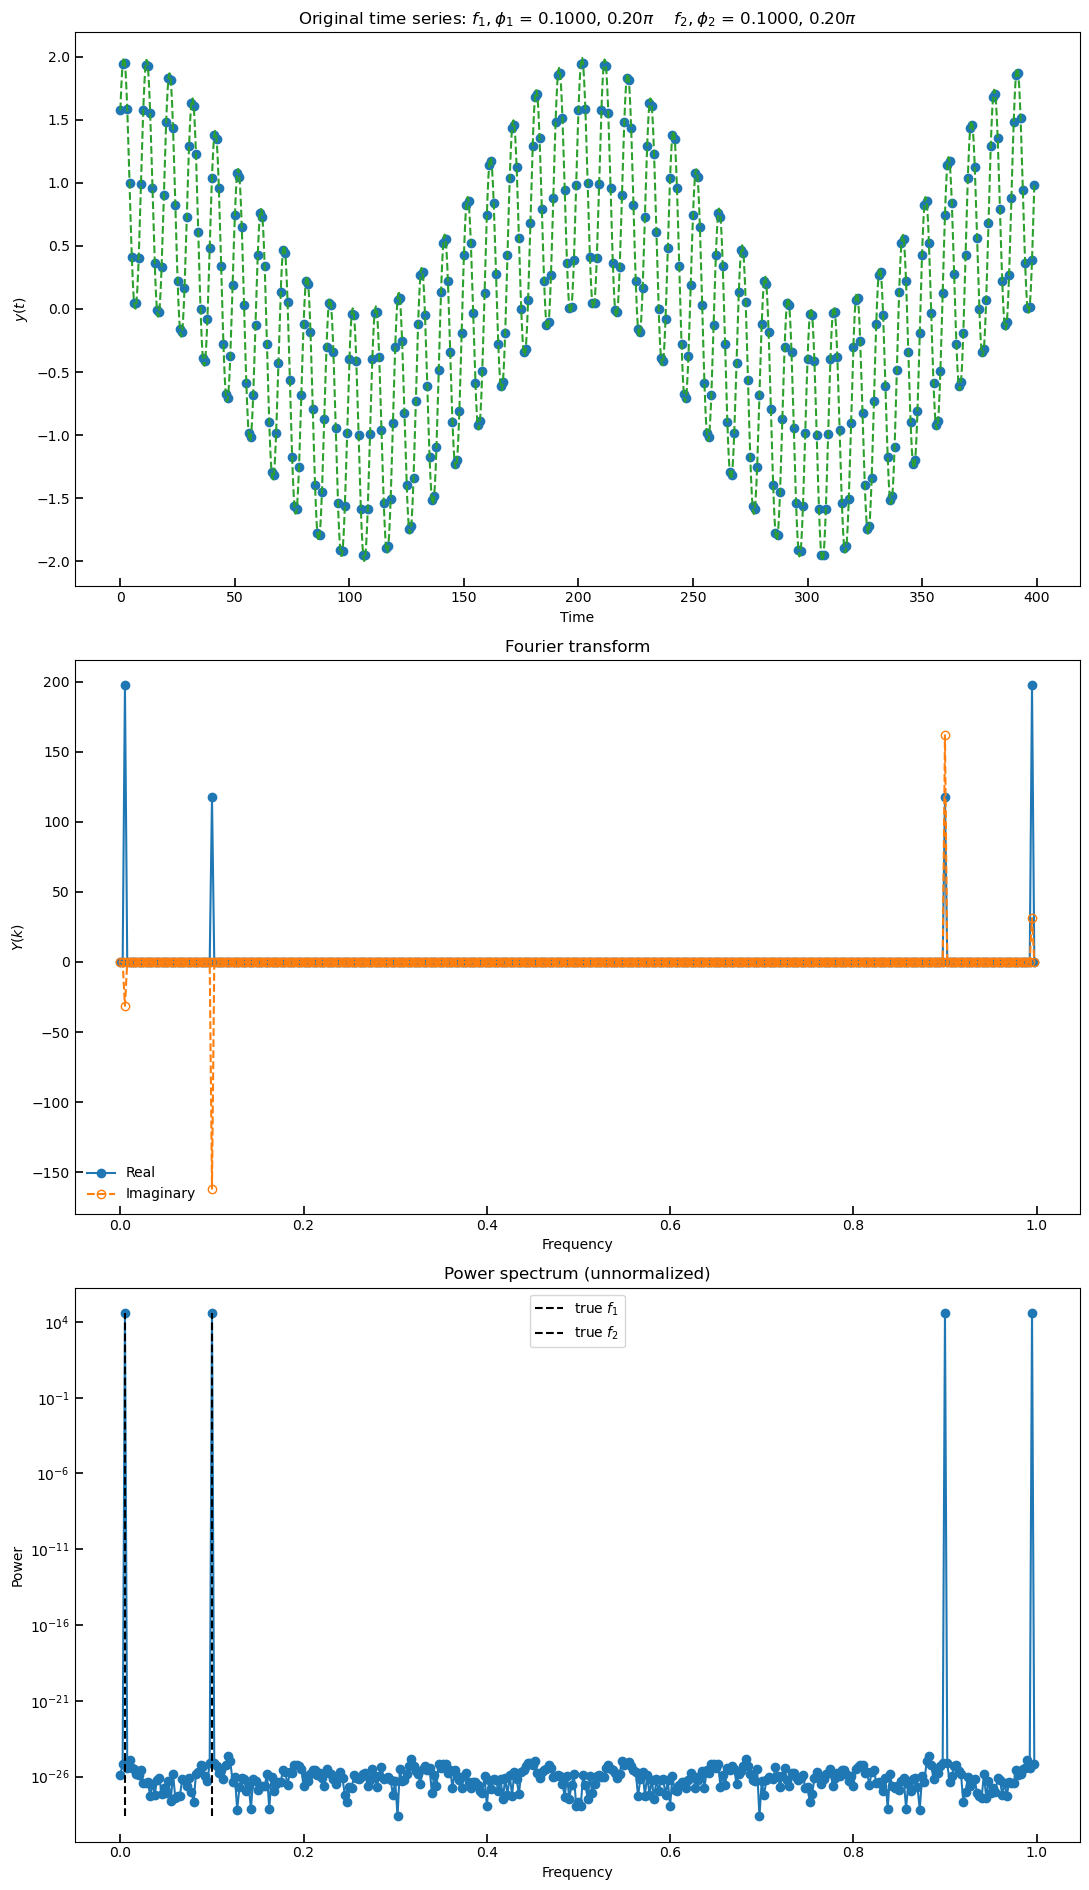

In [111]:
# ftdemo - Discrete Fourier transform demonstration program

# Set up configuration options and special features
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import os


# Define functions to take in integer and float inputs
def dinput(input_text) :
    return int(input(input_text))


def finput(input_text) :
    return float(input(input_text))


def ftdemo2(N,freq1,phase1,freq2,phase2,dt=1):
    """Plots the time series and FFT of two sine waves with the following parameters

    N - Number of sampling points
    freq1 - frequency of the first signal
    phase1 - multiplied by pi then taken as phase of first signal
    freq2 - frequency of the second signal
    phase2 - multiplied by pi then taken as phase of second signal
    dt - The time step between sample points, defaults to 1

    Note: Frequencies and phases should be much smaller than dt, which by default means much smaller than 1

    Outputs:
    Y - The fft of the signal desribed by input parameters
    """
    #* Initialize the sine wave time series to be transformed
    phase1 = np.pi * phase1
    #* Signal 2
    phase2 = np.pi * phase2

    # Generate the data for the time series
    #dt = 1   # Time increment
    t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
    y = np.sin(2*np.pi*t*freq1 + phase1) +np.sin(2*np.pi*t*freq2 + phase2)  # Sine wave time series
    fk = np.arange(N)/(N*dt)           # f = [0, 1/(N*dt), ... ], k index


    # Lets use a finely sampled function to compare to the data, for plotting purposes:
    tmod = np.linspace(0,t[-1],1024)
    ymod = np.sin(2*np.pi*tmod*freq1 + phase1) + np.sin(2*np.pi*tmod*freq2 + phase2)

    text_vals = r'$f_1, \phi_1$ = {0:.4f}, {1:.2f}$\pi$    $f_2, \phi_2$ = {0:.4f}, {1:.2f}$\pi$'.format(freq1,phase1/np.pi,freq2,phase2/np.pi)

    #* Compute the transform using the fast Fourier transform (FFT) algorithm.
    Y = np.zeros(N,dtype=complex)

    startTime = time.time()                     # Fast Fourier transform:
    Y = np.fft.fft(y)               # numpy.fft.fft()

    stopTime = time.time()

    print('Elapsed time = ', stopTime - startTime, ' seconds')

    # power spectrum :
    P = np.abs(Y)**2

    plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

    fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(11, 19))
    #* Graph the time series and its transform
    # Top subplot: time axis
    ax1[0].plot(t,y,'o', label='Input data')
    ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
    ax1[0].set_title('Original time series: ' + text_vals,fontsize=12)
    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('$y(t)$')
    # ax1[0].legend(frameon=True)
    ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Middle subplot: fourier transform
    ax1[1].plot(fk, np.real(Y),'-o', label='Real')
    ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
    ax1[1].legend(frameon=False)
    ax1[1].set_title('Fourier transform',fontsize=12)
    ax1[1].set_xlabel('Frequency')
    ax1[1].set_ylabel('$Y(k)$')
    ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Bottom subplot: Power Spectrum
    ax1[2].semilogy(fk, P,'-o')
    ax1[2].plot([freq1,freq1],[min(P),max(P)],'--',c='k',label='true $f_1$')
    ax1[2].plot([freq2,freq2],[min(P),max(P)],'--',c='k',label='true $f_2$')
    ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
    ax1[2].set_xlabel('Frequency')
    ax1[2].set_ylabel('Power')
    ax1[2].legend(loc='best')
    ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')
    #savefig('ftdemo_fig2.png')

    plt.tight_layout()

    save = False # Set this flag to true if you want to save the plots.
    if save:
        today = str(datetime.date.today())
        fig_directory = os.path.expanduser('~/figs_out/' + today)
        try:
            os.makedirs(fig_directory)
        except FileExistsError:
            pass

        timeindex = time.strftime("%H%M%S")
        fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

    plt.show()
    return Y,(t,y), (tmod, ymod), fk

N = 400
freq1 = 0.1
phase1 = 0.2
#* Signal 2
freq2 = 0.005
phase2 = 0.45


Y,(t,y),(tmod,ymod), fk =ftdemo2(N,freq1,phase1,freq2,phase2)

a) Use numpy.fft.ifft() to compute the inverse Fourier transform, plotting the result to verify that you can reconstruct the original signal.

C:\Users\Robin\.conda\envs\ProfHurst_PHYS240_Sp23\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


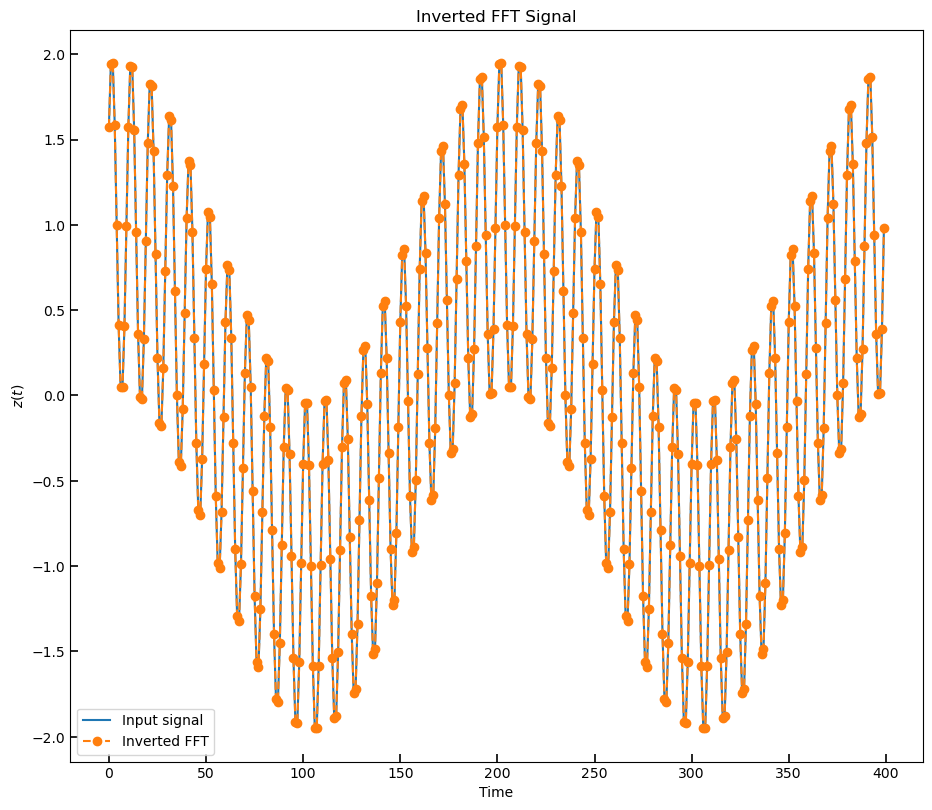

In [112]:
Z=np.fft.ifft(Y)#Z is the signal transformed back into the time domain

fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(11, 9.5))
#* Graph the time series and its transform
# Top subplot: time axis
ax1.plot(t,y,'-', label='Input signal')
#ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
ax1.plot(t,Z,'o--', label='Inverted FFT')

ax1.set_title('Inverted FFT Signal')
ax1.set_xlabel('Time')
ax1.set_ylabel('$z(t)$')
# ax1[0].legend(frameon=True)
ax1.tick_params('both', length=6, width = 1.2, which='major', direction='in')
ax1.legend(loc='best')


The two match pretty much exactly.

b) Construct a new version of the Fourier transform where the lower-frequency component is removed prior to invoking ifft() (i.e., a ‘high-pass filter’).
c )  Invert the new transform and plot the result on the same plot as the original signal in order to confirm that the filtering worked. Include a legend for the two signals (filtered and un-filtered). Use different colors, line-styles, and symbol types to differentiate the curves.

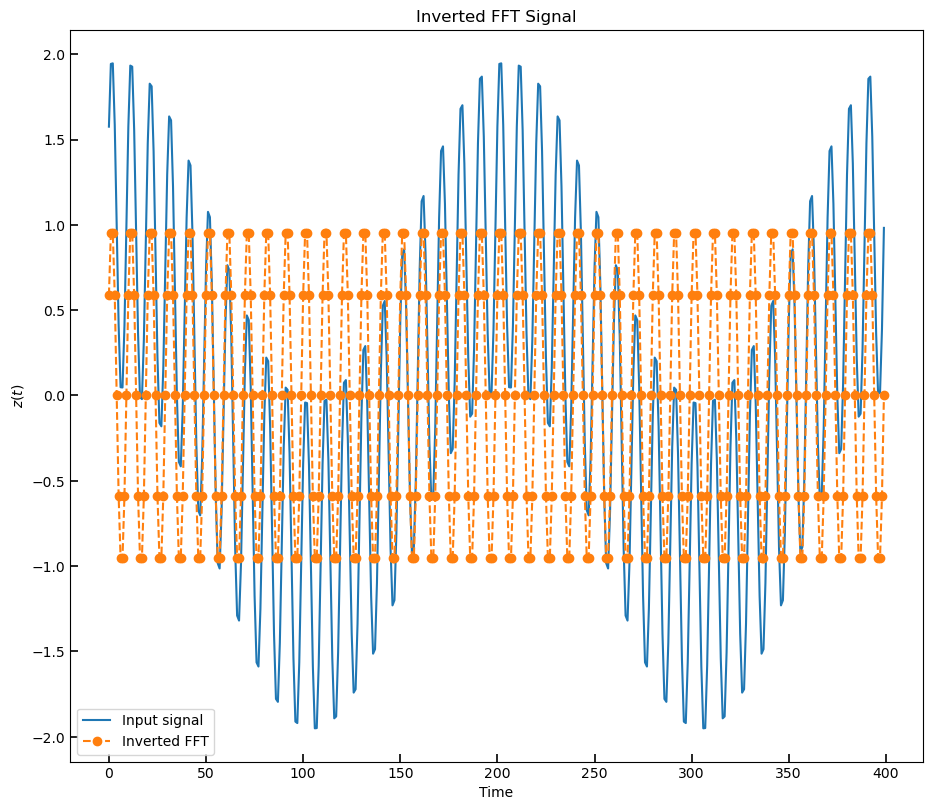

In [113]:

Y_filtered=np.copy(Y)


frac=1/10
lowpartindices=np.arange(start=0,stop=np.ceil(Y.size*frac/2),step=1,dtype=int)
lowpartindices_reflected=np.arange(start=np.ceil(Y.size-Y.size*frac/2),stop=Y.size,step=1,dtype=int)

#remove the lowest *frac* (say lowest tenth) of the fft signal, both in the first part and the alias that is the second half
Y_filtered[lowpartindices]=np.zeros(lowpartindices.size)
Y_filtered[lowpartindices_reflected]=np.zeros(lowpartindices.size)



Z_filtered=np.fft.ifft(Y_filtered)#Z is the signal transformed back into the time domain

fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(11, 9.5))
#* Graph the time series and its transform
# Top subplot: time axis
ax1.plot(t,y,'-', label='Input signal')
#ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
ax1.plot(t,Z_filtered,'o--', label='Inverted FFT')

ax1.set_title('Inverted FFT Signal')
ax1.set_xlabel('Time')
ax1.set_ylabel('$z(t)$')
# ax1[0].legend(frameon=True)
ax1.tick_params('both', length=6, width = 1.2, which='major', direction='in')
ax1.legend(loc='best')


d) Plot the power spectrum of the filtered and un-filtered signals and comment on the differences between the two.

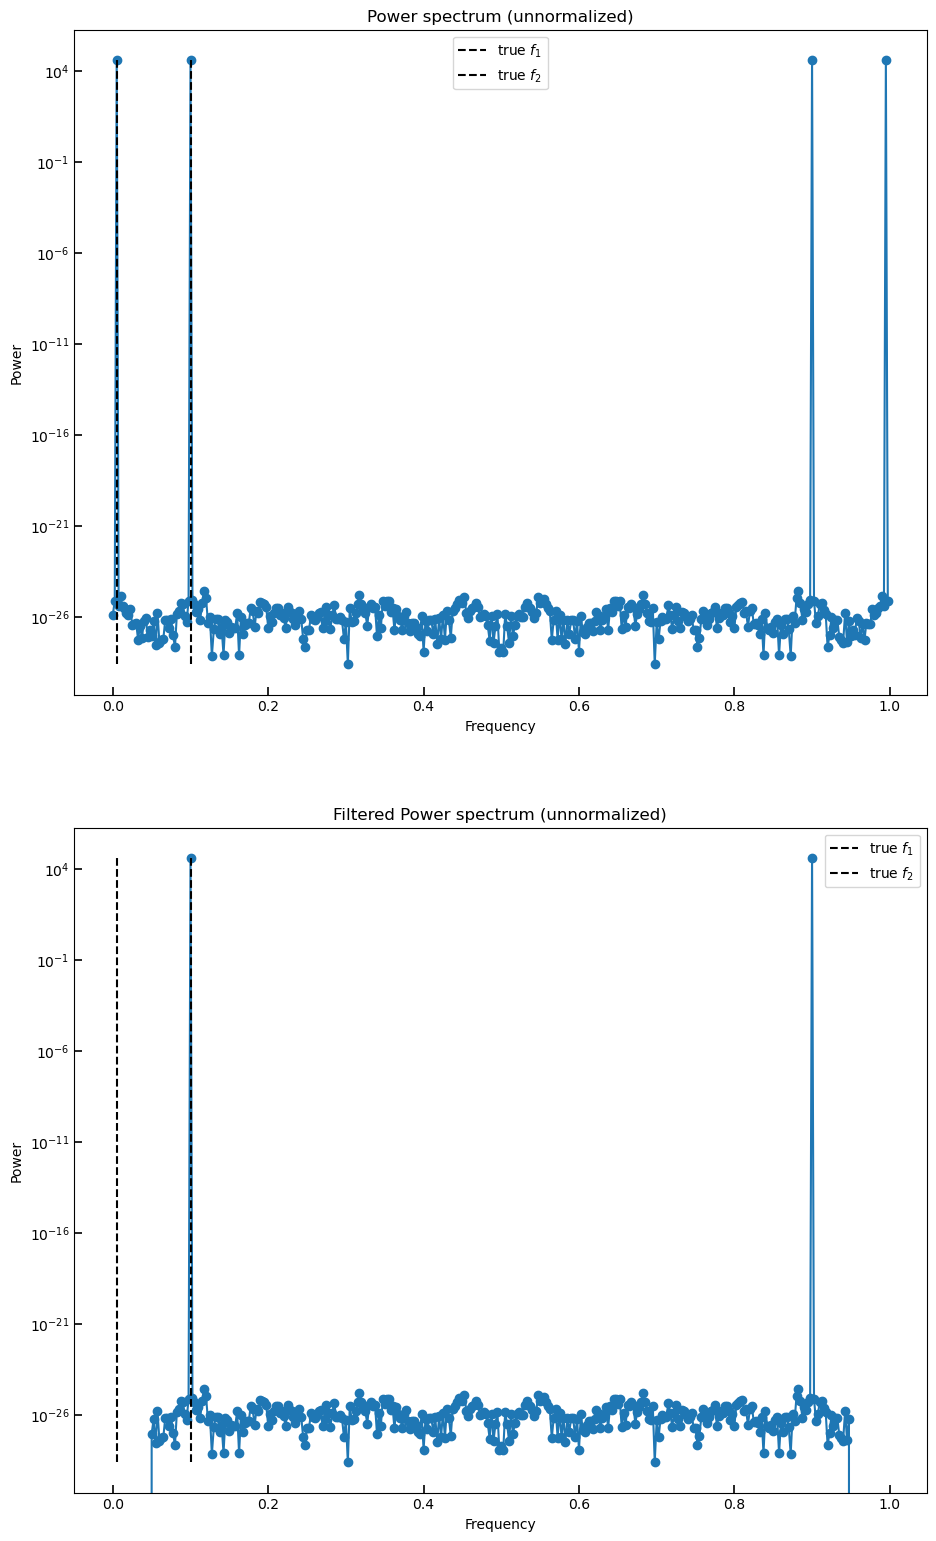

In [115]:
P = np.abs(Y)**2
P_filt= np.abs(Y_filtered)**2

fig1, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(11, 19))
ax1[0].semilogy(fk, P,'-o')
ax1[0].plot([freq1,freq1],[min(P),max(P)],'--',c='k',label='true $f_1$')
ax1[0].plot([freq2,freq2],[min(P),max(P)],'--',c='k',label='true $f_2$')
ax1[0].set_title('Power spectrum (unnormalized)', fontsize=12)
ax1[0].set_xlabel('Frequency')
ax1[0].set_ylabel('Power')
ax1[0].legend(loc='best')
ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

ax1[1].semilogy(fk, P_filt,'-o')
ax1[1].plot([freq1,freq1],[min(P),max(P)],'--',c='k',label='true $f_1$')
ax1[1].plot([freq2,freq2],[min(P),max(P)],'--',c='k',label='true $f_2$')
ax1[1].set_title('Filtered Power spectrum (unnormalized)', fontsize=12)
ax1[1].set_xlabel('Frequency')
ax1[1].set_ylabel('Power')
ax1[1].legend(loc='best')
ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')

To completely remove the low frequency signal, I needed to remove it from the first half of the FFt, and the second (aliased) half. By setting the fourier components of the first and last 10% of each copy of the signal to zeros, I removed teh spike that signified the lower frequency component. Being set to zero means those sections shoot to negative infinity on the log scale rather than the background 10^-26 or so.

** Challenge Question

Compute and plot the Fourier transform and power spectrum of the following functions